## Data Exploration 02: Team Stat Analysis

Our goal is to explore the stats of each team.

First, let us compare the efficiency per action of their team versus their division's average.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:,.2f}".format

In [32]:
player_stats = pd.read_csv('../data/player_stats.csv')
team_stats = pd.read_csv('../data/team_stats.csv')

In [33]:
player_stats.head()

,name,nationality,position,division,opponent,match_date,phase,sets_won,sets_played,points_scored,...,rec_attempts,rec_total,dig_excellents,dig_faults,dig_attempts,dig_total,set_excellents,set_faults,set_stills,set_total
0,Matias SANCHEZ,Argentina,Setter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,2,0,1,3
1,Joaquin GALLEGO,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,2,4,1,2,2,5,0,0,2,2
2,Agustin LOSER,Argentina,Middle Blocker,Men,United States,2022-07-10,Pool,2,5,11,...,1,1,4,1,3,8,0,0,0,0
3,Santiago DANANI,Argentina,Libero,Men,United States,2022-07-10,Pool,2,5,0,...,9,21,12,4,2,18,0,0,6,6
4,Nicolás LAZO,Argentina,Outside Hitter,Men,United States,2022-07-10,Pool,2,5,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
team_stats.head()

,team,opponent,division,phase,sets_won,sets_played,sets_scores,team_attacks,team_blocks,team_aces,opp_errors,team_total_points,team_digs,team_receptions,team_sets,team_err_committed,opp_points
0,Bulgaria,Serbia,Men,Pool,1,4,"[25, 19, 22, 20]",52,15,3,16,86,56,85,98,28,94
1,Serbia,Bulgaria,Men,Pool,3,4,"[19, 25, 25, 25]",54,4,8,28,94,76,74,105,16,86
2,China,Iran,Men,Pool,1,4,"[15, 25, 22, 15]",44,6,5,22,77,30,78,59,25,94
3,Iran,China,Men,Pool,3,4,"[25, 19, 25, 25]",48,7,14,25,94,39,65,63,22,77
4,Canada,Germany,Men,Pool,0,3,"[19, 20, 28]",37,4,4,22,67,42,62,77,23,80


In [35]:
grouped_attempts = player_stats.groupby(['nationality', 'division', 'opponent', 'match_date', 'phase', 'sets_won', 'sets_played'], as_index=False).sum()

In [36]:
team_stats.columns

Index(['team', 'opponent', 'division', 'phase', 'sets_won', 'sets_played',
       'sets_scores', 'team_attacks', 'team_blocks', 'team_aces', 'opp_errors',
       'team_total_points', 'team_digs', 'team_receptions', 'team_sets',
       'team_err_committed', 'opp_points'],
      dtype='object')

In [37]:
team_stats_merged = grouped_attempts.merge(team_stats[['team', 'division', 'opponent', 'phase', 'team_total_points', 'team_err_committed']],
                                           left_on=['nationality', 'division', 'opponent', 'phase'],
                                           right_on=['team', 'division', 'opponent', 'phase']).drop('team', axis=1)
team_stats_merged

,nationality,division,opponent,match_date,phase,sets_won,sets_played,points_scored,attack_kills,attack_faults,...,dig_excellents,dig_faults,dig_attempts,dig_total,set_excellents,set_faults,set_stills,set_total,team_total_points,team_err_committed
0,Argentina,Men,Australia,2022-07-08,Pool,3,4,74,54,19,...,34,17,11,62,48,0,52,100,96,26
1,Argentina,Men,Canada,2022-07-05,Pool,3,4,61,50,13,...,31,11,7,49,28,1,80,109,99,29
2,Argentina,Men,China,2022-06-24,Pool,3,4,70,61,13,...,35,15,8,58,37,1,63,101,97,29
3,Argentina,Men,France,2022-07-09,Pool,3,4,71,62,12,...,45,15,13,73,29,1,85,115,98,35
4,Argentina,Men,Germany,2022-06-09,Pool,3,4,63,47,14,...,30,12,16,58,26,0,68,94,93,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,United States,Women,Poland,2022-06-17,Pool,3,3,61,51,9,...,46,10,3,59,15,0,71,86,75,10
410,United States,Women,Serbia,2022-07-01,Pool,3,3,62,48,10,...,43,11,2,56,14,1,79,94,83,11
411,United States,Women,Serbia,2022-07-13,Quarterfinals,2,5,90,66,26,...,57,21,3,81,20,1,105,126,113,22
412,United States,Women,Thailand,2022-06-19,Pool,3,4,74,61,16,...,68,8,7,83,33,1,103,137,92,27


In [38]:
team_stats_merged.columns

Index(['nationality', 'division', 'opponent', 'match_date', 'phase',
       'sets_won', 'sets_played', 'points_scored', 'attack_kills',
       'attack_faults', 'attack_shots', 'attack_total', 'block_kills',
       'block_faults', 'block_rebounds', 'block_total', 'serve_aces',
       'serve_errors', 'serve_attempts', 'serve_total', 'rec_excellents',
       'rec_faults', 'rec_attempts', 'rec_total', 'dig_excellents',
       'dig_faults', 'dig_attempts', 'dig_total', 'set_excellents',
       'set_faults', 'set_stills', 'set_total', 'team_total_points',
       'team_err_committed'],
      dtype='object')

In [39]:
# We'll define efficiency as no. of kills/excellents minus no. of errors over the total attempts.
# We'll also split out aces with a successful serve.

stat_list = [['attack_eff', 'attack_kills', 'attack_faults', 'attack_total'], 
             ['block_eff', 'block_kills', 'block_faults', 'block_total'],
             ['ace_eff', 'serve_aces', 'serve_errors', 'serve_total'],
             ['rec_eff', 'rec_excellents', 'rec_faults', 'rec_total'],
             ['dig_eff', 'dig_excellents', 'dig_faults', 'dig_total'],
             ['set_eff', 'set_excellents', 'set_faults', 'set_total']]

for stat in stat_list:
    team_stats_merged[stat[0]] = 100 * (team_stats_merged[stat[1]] - team_stats_merged[stat[2]]) / team_stats_merged[stat[3]]
    
team_stats_merged['serve_eff'] = 100 * (team_stats_merged['serve_aces'] + team_stats_merged['serve_attempts'] - team_stats_merged['serve_errors']) / team_stats_merged['serve_total']    

In [40]:
# We'll define 'success rate' as a successful action over total attempts. Note the difference between the scoring and non-scoring skills. 

stat_list2 = [['attack_succ', 'attack_kills', 'attack_total'], 
              ['block_succ', 'block_kills', 'block_total'],
              ['ace_succ', 'serve_aces', 'serve_total']]

stat_list3 = [['serve_succ', 'serve_aces', 'serve_attempts', 'serve_total'],
              ['rec_succ', 'rec_excellents', 'rec_attempts', 'rec_total'],
              ['dig_succ', 'dig_excellents', 'dig_attempts', 'dig_total'],
              ['set_succ', 'set_excellents', 'set_stills', 'set_total']]

for stat in stat_list2:
    team_stats_merged[stat[0]] = 100 * team_stats_merged[stat[1]] / team_stats_merged[stat[2]]
    
for stat in stat_list3:
    team_stats_merged[stat[0]] = 100 * (team_stats_merged[stat[1]] + team_stats_merged[stat[2]]) / team_stats_merged[stat[3]]    

In [41]:
# We will only focus on the efficiency. Let's look into the stats of the France Men's team and compare their efficiency per action as opposed to the division average.

team_stats_merged[(team_stats_merged['division'] == 'Men') & (team_stats_merged['nationality'] == 'France')][['opponent', 'match_date', 'sets_won', 
                                                                                                              'attack_eff', 'attack_succ', 'block_eff', 'block_succ', 
                                                                                                              'ace_eff', 'ace_succ', 'serve_eff', 'serve_succ',
                                                                                                              'rec_eff', 'rec_succ', 'dig_eff', 'dig_succ', 
                                                                                                              'set_eff', 'set_succ']].sort_values('match_date')

,opponent,match_date,sets_won,attack_eff,attack_succ,block_eff,block_succ,ace_eff,ace_succ,serve_eff,serve_succ,rec_eff,rec_succ,dig_eff,dig_succ,set_eff,set_succ
153,Italy,2022-06-08,3,27.06,43.53,-20.93,13.95,-13.51,5.41,62.16,81.08,24.49,95.92,40.68,83.05,56.63,98.80
159,Serbia,2022-06-09,3,35.45,46.36,-29.41,14.71,-9.47,10.53,60.00,80.00,25.97,96.10,29.69,73.44,51.85,99.07
151,Canada,2022-06-10,3,32.91,45.57,0.00,24.24,-13.70,8.22,56.16,78.08,10.42,89.58,32.61,78.26,41.10,98.63
158,Poland,2022-06-12,1,33.01,48.54,-28.26,13.04,-13.19,9.89,53.85,76.92,13.58,91.36,21.31,70.49,37.86,97.09
157,Netherlands,2022-06-23,3,63.93,67.21,-2.50,30.00,-12.16,5.41,64.86,82.43,20.00,87.50,62.07,82.76,25.42,100.00
155,Japan,2022-06-25,3,37.50,44.32,-19.51,19.51,-11.84,6.58,63.16,81.58,39.58,97.92,57.41,85.19,19.77,97.67
152,Germany,2022-06-26,3,37.93,55.17,-13.16,26.32,-22.58,8.60,37.63,68.82,15.79,92.98,62.22,84.44,20.93,98.84
160,United States,2022-07-07,2,24.41,41.73,-3.03,15.15,-20.21,7.45,44.68,72.34,20.73,92.68,32.56,79.07,19.70,99.24
150,Brazil,2022-07-08,3,50.00,56.98,-25.00,16.67,-13.70,15.07,42.47,71.23,11.67,91.67,58.54,92.68,26.74,98.84
148,Argentina,2022-07-09,1,37.62,46.53,-29.82,7.02,-21.11,3.33,51.11,75.56,18.06,93.06,26.67,72.00,17.59,100.00


In [42]:
# Add another column for 'group' (division and team) that we will use later for plotting
men_stats = team_stats_merged[(team_stats_merged['division'] == 'Men')][['nationality', 'opponent', 'match_date', 
                                                                    'attack_eff', 'block_eff', 'ace_eff', 'serve_eff',
                                                                    'rec_eff', 'dig_eff', 'set_eff']].sort_values('match_date')

men_stats = pd.melt(men_stats, id_vars=['nationality', 'opponent', 'match_date'], 
                    value_vars=['attack_eff', 'block_eff', 'ace_eff', 'serve_eff', 'rec_eff', 'dig_eff', 'set_eff'],
                    var_name='stats', value_name='eff')

men_stats['group'] = 'Division'

men_stats_france = men_stats[men_stats['nationality']=='France'].copy()
men_stats_france['group'] = 'France'

men_stats_plot = pd.concat([men_stats_france, men_stats])
men_stats_plot

,nationality,opponent,match_date,stats,eff,group
11,France,Italy,2022-06-08,attack_eff,27.06,France
16,France,Serbia,2022-06-09,attack_eff,35.45,France
28,France,Canada,2022-06-10,attack_eff,32.91,France
58,France,Poland,2022-06-12,attack_eff,33.01,France
86,France,Netherlands,2022-06-23,attack_eff,63.93,France
...,...,...,...,...,...,...
1437,France,Italy,2022-07-23,set_eff,19.72,Division
1438,Poland,Italy,2022-07-24,set_eff,15.58,Division
1439,Italy,Poland,2022-07-24,set_eff,11.36,Division
1440,United States,France,2022-07-24,set_eff,24.53,Division


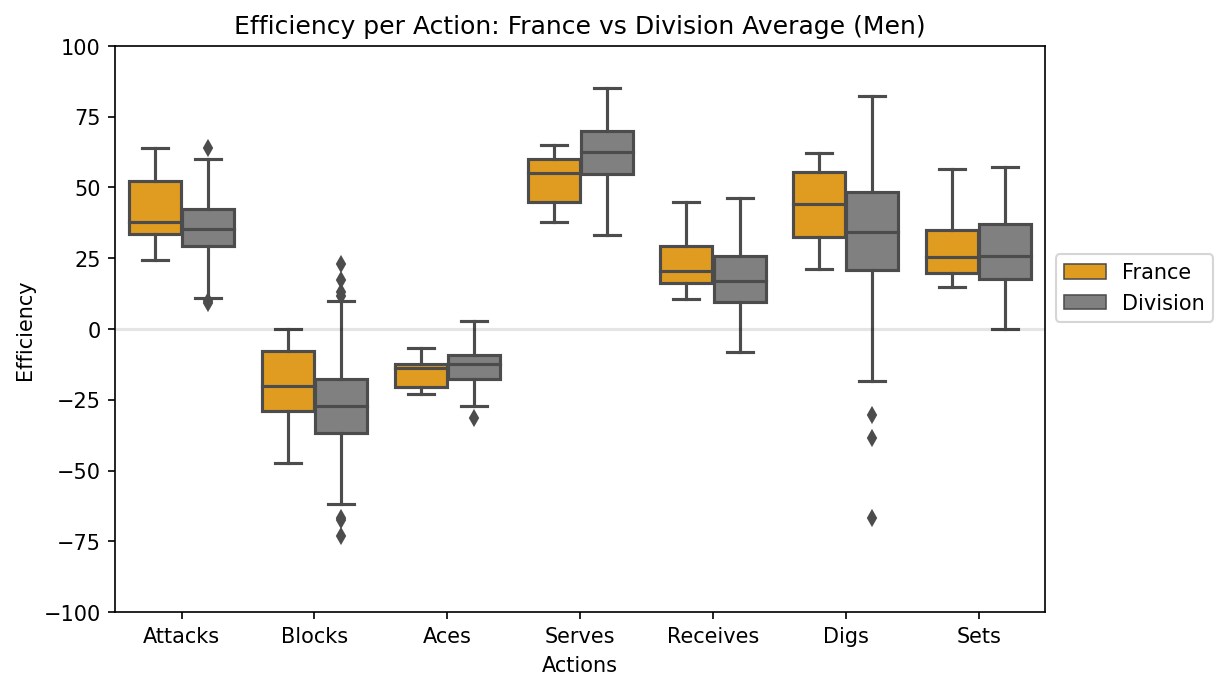

In [43]:
nat='France'
div='Men'

plt.figure(figsize=(8,5), dpi=150)

ax = sns.boxplot(data=men_stats_plot, x='stats', y='eff', hue='group', palette=['orange', 'grey'])
ax.set_xticklabels(['Attacks', 'Blocks', 'Aces', 'Serves', 'Receives', 'Digs', 'Sets'])
plt.axhline(0, 0, 1, alpha=0.1, color='black')
plt.ylim(-100,100)
plt.title(f'Efficiency per Action: {nat} vs Division Average ({div})')
plt.ylabel('Efficiency')
plt.xlabel('Actions')

ax.legend(bbox_to_anchor=(1,0.65))

plt.savefig(f'../graphs/eff_per_action/{div}-{nat}.png', bbox_inches='tight')
plt.show();

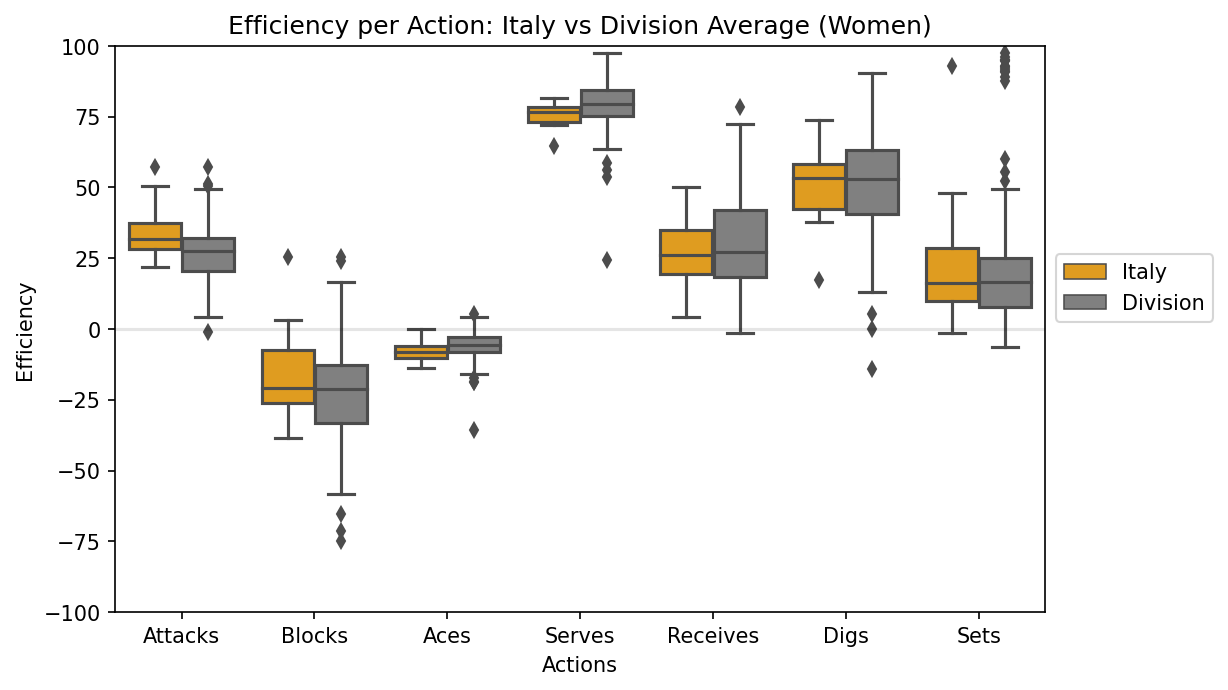

In [44]:
# Let's look at Italy's women's team.
women_stats = team_stats_merged[(team_stats_merged['division'] == 'Women')][['nationality', 'opponent', 'match_date', 
                                                                    'attack_eff', 'block_eff', 'ace_eff', 'serve_eff',
                                                                    'rec_eff', 'dig_eff', 'set_eff']].sort_values('match_date')

women_stats = pd.melt(women_stats, id_vars=['nationality', 'opponent', 'match_date'], 
                    value_vars=['attack_eff', 'block_eff', 'ace_eff', 'serve_eff', 'rec_eff', 'dig_eff', 'set_eff'],
                    var_name='stats', value_name='eff')
women_stats['group'] = 'Division'

women_stats_italy = women_stats[women_stats['nationality']=='Italy'].copy()
women_stats_italy['group'] = 'Italy'

women_stats_plot = pd.concat([women_stats_italy, women_stats])
women_stats_plot

nat='Italy'
div='Women'

plt.figure(figsize=(8,5), dpi=150)

ax = sns.boxplot(data=women_stats_plot, x='stats', y='eff', hue='group', palette=['orange', 'grey'])
ax.set_xticklabels(['Attacks', 'Blocks', 'Aces', 'Serves', 'Receives', 'Digs', 'Sets'])
plt.axhline(0, 0, 1, alpha=0.1, color='black')
plt.ylim(-100,100)
plt.title(f'Efficiency per Action: {nat} vs Division Average ({div})')
plt.ylabel('Efficiency')
plt.xlabel('Actions')

ax.legend(bbox_to_anchor=(1,0.65))

plt.show();

In [ ]:
# We will do the same for every team

for div in ['Men', 'Women']:

    stats = team_stats_merged[(team_stats_merged['division'] == div)][['nationality', 'opponent', 'match_date', 
                                                                        'attack_eff', 'block_eff', 'ace_eff', 'serve_eff',
                                                                        'rec_eff', 'dig_eff', 'set_eff']].sort_values('match_date')

    stats = pd.melt(stats, id_vars=['nationality', 'opponent', 'match_date'], 
                    value_vars=['attack_eff', 'block_eff', 'ace_eff', 'serve_eff', 'rec_eff', 'dig_eff', 'set_eff'],
                    var_name='stats', value_name='eff')

    stats['group'] = 'Total'

    for nat in stats['nationality'].unique():
        stats_grouped = stats[stats['nationality']==nat].copy()
        stats_grouped['group'] = nat

        stats_plot = pd.concat([stats_grouped, stats])

        plt.figure(figsize=(8,5), dpi=150)

        ax = sns.boxplot(data=stats_plot, x='stats', y='eff', hue='group', palette=['orange', 'grey'])
        ax.set_xticklabels(['Attacks', 'Blocks', 'Aces', 'Serves', 'Receives', 'Digs', 'Sets'])
        plt.axhline(0, 0, 1, alpha=0.1, color='black')
        plt.ylim(-100,100)
        plt.title(f'Efficiency per Action: {nat} vs Division Average ({div})')
        plt.ylabel('Efficiency')
        plt.xlabel('Actions')

        ax.legend(bbox_to_anchor=(1,0.65))

        plt.savefig(f'../graphs/eff_per_action/{div}-{nat}.png', bbox_inches='tight')

The graphs can be found [HERE](https://github.com/emdomingo/vnl2022-stats-exploration/tree/main/graphs/eff_per_action/).